In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
cm = cmap.inferno

import numpy as np
import scipy as sp
import theano
import theano.tensor as tt
import theano.tensor.nlinalg
import sys
import pymc3 as pm
import pandas as pd

In [2]:
df = pd.read_csv('embedding_vals.csv', index_col=0)
df.head()

,years,Means 0,Means 1
0,2011,1.949354,0.598884
1,2015,0.508923,1.252961
2,2012,1.538876,1.400515
3,2015,0.126540,3.254572
4,2016,-0.437363,2.561972


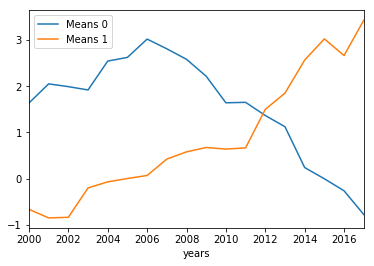

In [4]:
df.groupby('years').mean().plot()

In [16]:
# X = np.array(df.groupby('years').mean().index)
X = np.arange(len(df.groupby('years').mean().index)).reshape(-1, 1)
Y = df.groupby('years').mean()['Means 0'].values.reshape(-1, 1)

In [17]:
X.shape, Y.shape

((18, 1), (18, 1))

In [64]:
with pm.Model() as model:
    # l = pm.Uniform('l', 0, 10)
    
    log_s2_f = pm.Uniform('log_s2_f', lower=-10, upper=5)
    s2_f = pm.Deterministic('s2_f', tt.exp(log_s2_f))
    
    f_cov = s2_f * pm.gp.cov.ExpQuad(1, 0.5)
    
    log_s2_n = pm.Uniform('log_s2_n', lower=-10, upper=5)
    s2_n = pm.Deterministic('s2_n', tt.exp(log_s2_n))    
    y_obs = pm.gp.GP('y_obs', cov_func=f_cov, sigma=s2_n, observed={'X':X, 'Y':Y})

In [65]:
with model:
    trace = pm.sample(2000)


Auto-assigning NUTS sampler...
Initializing NUTS using advi...




  0%|          | 0/200000 [00:00<?, ?it/s]


  0%|          | 337/200000 [00:00<00:59, 3362.85it/s]


  0%|          | 677/200000 [00:00<00:59, 3373.06it/s]


  1%|          | 1014/200000 [00:00<00:59, 3370.40it/s]


  1%|          | 1353/200000 [00:00<00:58, 3375.24it/s]


  1%|          | 1692/200000 [00:00<00:58, 3376.16it/s]


  1%|          | 2030/200000 [00:00<00:58, 3375.28it/s]


  1%|          | 2369/200000 [00:00<00:58, 3377.74it/s]


  1%|▏         | 2706/200000 [00:00<00:58, 3373.41it/s]


  2%|▏         | 3035/200000 [00:00<00:58, 3345.96it/s]


  2%|▏         | 3367/200000 [00:01<00:58, 3333.39it/s]


  2%|▏         | 3706/200000 [00:01<00:58, 3348.44it/s]


  2%|▏         | 4036/200000 [00:01<00:58, 3329.75it/s]


  2%|▏         | 4374/200000 [00:01<00:58, 3341.76it/s]


  2%|▏         | 4705/200000 [00:01<00:58, 3317.77it/s]


  3%|▎         | 5042/200000 [00:01<00:58, 3322.37it/s]


  3%|▎         | 538

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13da40ed68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f13db582828>]], dtype=object)

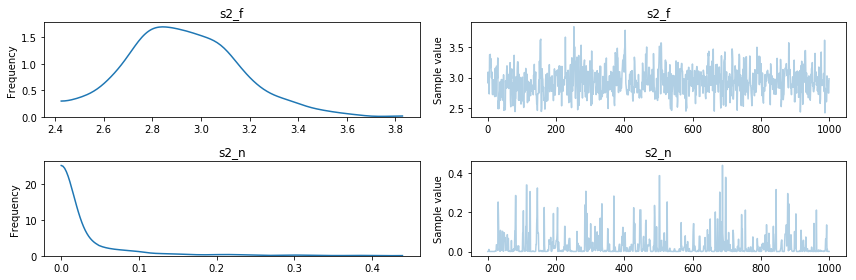

In [66]:
pm.traceplot(trace[1000:], varnames=['s2_f', 's2_n'])

In [63]:
Z = np.linspace(0, 18, 17)[:, None]
with model:
    gp_samples = pm.gp.sample_gp(trace, y_obs, Z)



  0%|          | 0/2000 [00:00<?, ?it/s]

ValueError: Array 'mean' must be a vector of length 17.